# Dependencies

In [1]:
!pip3 install tensorflow==2.14.0
!pip3 install scikeras==0.12.0
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn
!pip3 install cartopy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import math

import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Basic analysis

In [3]:
df = pd.read_csv("../data/housing.csv")
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [4]:
df.shape[0]

20640

In [5]:
df.rename({"median_house_value": "target"}, inplace=True, axis=1)
df.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY


In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
target                float64
ocean_proximity        object
dtype: object

In [7]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
target                False
ocean_proximity       False
dtype: bool

In [8]:
df["total_bedrooms"].isnull().sum()

207

In [9]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
target                False
ocean_proximity       False
dtype: bool

In [10]:
numerical_features = ["longitude",
                      "latitude",
                      "housing_median_age",
                      "total_rooms",
                      "total_bedrooms",
                      "population",
                      "households",
                      "median_income"]
categorical_features = ["ocean_proximity"]

## Scatter plot

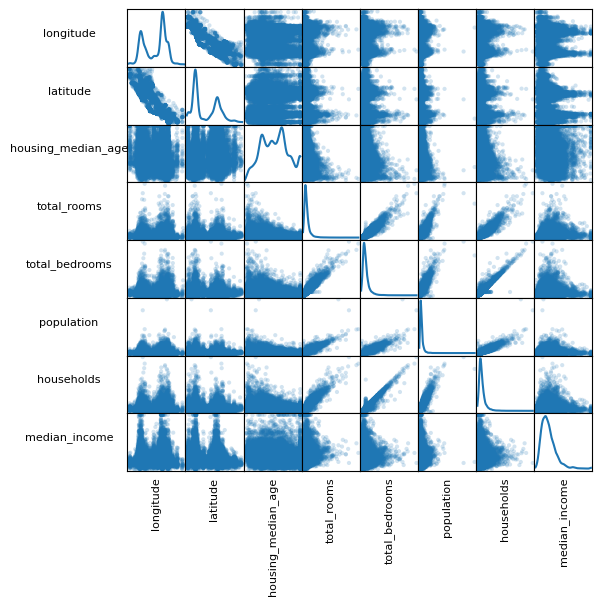

In [11]:
def plot_scatter_matrix(df):
    sm = pd.plotting.scatter_matrix(df, alpha=0.2, diagonal="kde", figsize=(6,6))
    [s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
    [s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
    [s.yaxis.label.set_size(8) for s in sm.reshape(-1)]
    [s.xaxis.label.set_size(8) for s in sm.reshape(-1)]
    [s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]
    [s.set_xticks(()) for s in sm.reshape(-1)]
    [s.set_yticks(()) for s in sm.reshape(-1)]

    plt.show()

plot_scatter_matrix(df[numerical_features])

## Absolute correlations

In [12]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
    
get_top_abs_correlations(df[numerical_features], 20)

total_bedrooms      households            0.974725
total_rooms         total_bedrooms        0.927253
longitude           latitude              0.924664
total_rooms         households            0.918484
population          households            0.907222
total_bedrooms      population            0.873910
total_rooms         population            0.857126
housing_median_age  total_rooms           0.361262
                    total_bedrooms        0.318998
                    households            0.302916
                    population            0.296244
total_rooms         median_income         0.198050
housing_median_age  median_income         0.119034
latitude            population            0.108785
longitude           housing_median_age    0.108197
                    population            0.099773
latitude            median_income         0.079809
                    households            0.071035
longitude           total_bedrooms        0.069260
latitude            total_bedro

<Axes: >

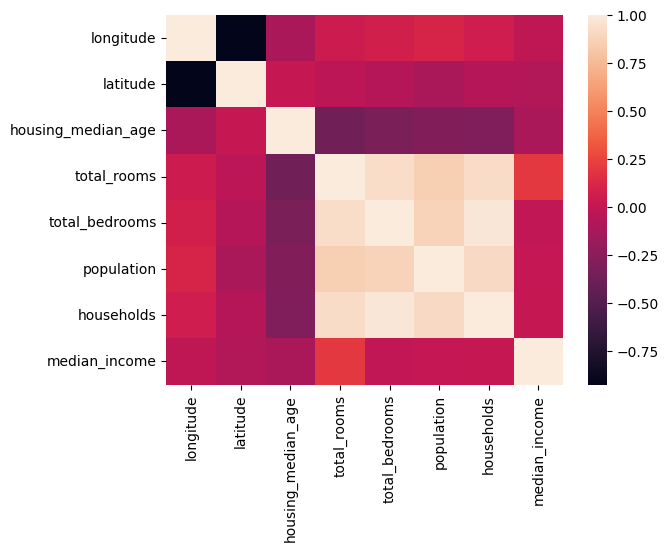

In [13]:
sns.heatmap(df[numerical_features].corr())

## Median house value according to location

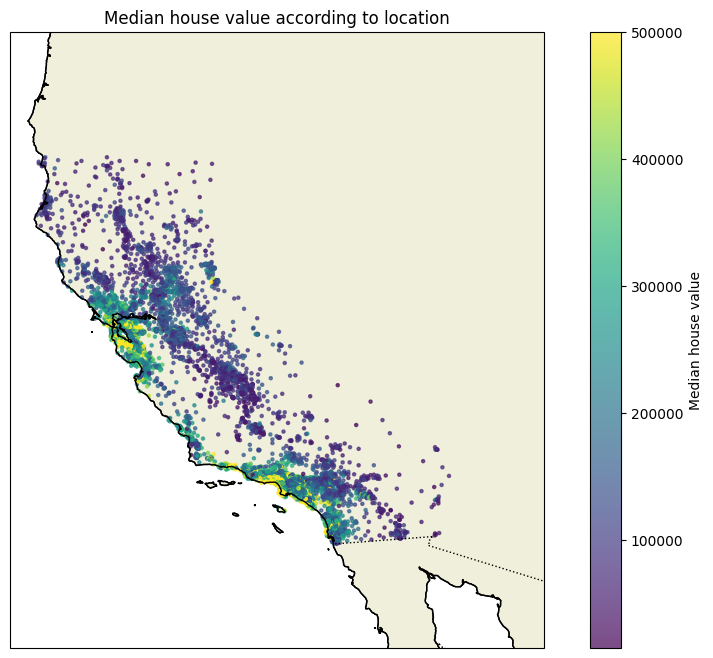

In [14]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-125, -112, 30, 45], crs=ccrs.PlateCarree())  # Adjust the extent as needed

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

sc = ax.scatter(df['longitude'], df['latitude'], c=df['target'], cmap='viridis', s=5, alpha=0.7, transform=ccrs.PlateCarree())
plt.colorbar(sc, label='Median house value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Median house value according to location')

plt.show()

# Baseline and encoding

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, df[["latitude", "longitude"]], df[["ocean_proximity"]], cv=10).mean()

/home/facu/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


0.8218507751937985

In [16]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [17]:
from sklearn.linear_model import LinearRegression

enc = OrdinalEncoder()
df["ocean_proximity_enc"] = enc.fit_transform(df[["ocean_proximity"]])
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity,ocean_proximity_enc
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [18]:
reg = LinearRegression()

cross_val_score(reg, df[["latitude", "longitude"]], df[["ocean_proximity_enc"]], scoring="neg_root_mean_squared_error", cv=10).mean()

-1.3668472239631348

In [19]:
custom_encoding = {"ISLAND": 4, "NEAR OCEAN": 3, "NEAR BAY": 2, "<1H OCEAN": 1, "INLAND": 0}
df["ocean_proximity_enc_2"] = df.replace({"ocean_proximity": custom_encoding})["ocean_proximity"]
df.head(5)

/tmp/ipykernel_5406/3353758806.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ocean_proximity_enc_2"] = df.replace({"ocean_proximity": custom_encoding})["ocean_proximity"]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity,ocean_proximity_enc,ocean_proximity_enc_2
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,3.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,3.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,3.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,3.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0,2


In [20]:
reg = LinearRegression()

cross_val_score(reg, df[["latitude", "longitude"]], df[["ocean_proximity_enc_2"]], scoring="neg_root_mean_squared_error", cv=10).mean()

-0.7262468037576228

In [21]:
corr_with_target = \
    df[numerical_features+["ocean_proximity_enc", "ocean_proximity_enc_2"]].corrwith(df["target"]).abs().sort_values(ascending=False)
corr_with_target

median_income            0.688075
ocean_proximity_enc_2    0.383244
latitude                 0.144160
total_rooms              0.134153
housing_median_age       0.105623
ocean_proximity_enc      0.081750
households               0.065843
total_bedrooms           0.049454
longitude                0.045967
population               0.024650
dtype: float64

# Plots

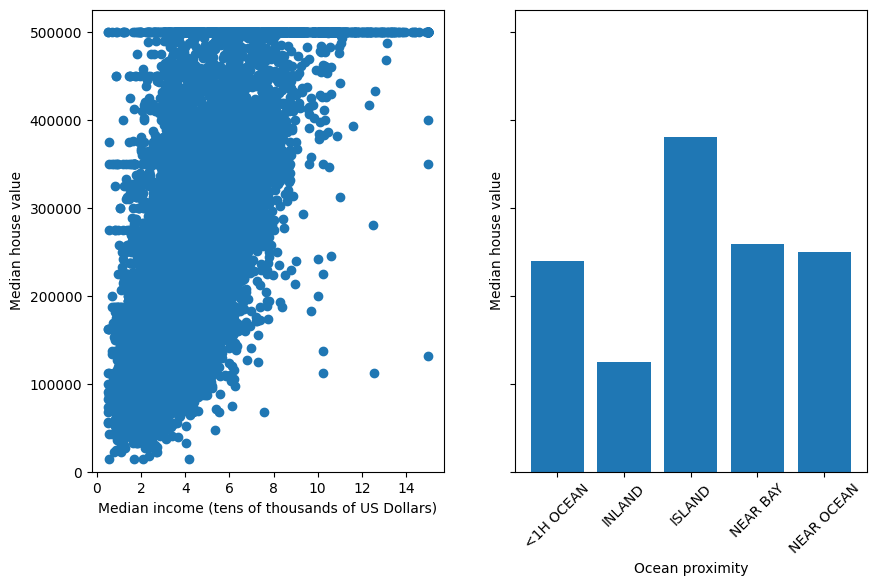

In [22]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,6), sharey=True)

means = df.groupby("ocean_proximity")["target"].mean()

ax0.scatter(df["median_income"], df["target"])
ax0.set_xlabel("Median income (tens of thousands of US Dollars)")
ax0.set_ylabel("Median house value")

plt.xticks(rotation=45)
ax1.bar(means.index, means)
ax1.set_xlabel("Ocean proximity")
ax1.set_ylabel("Median house value")
plt.show()

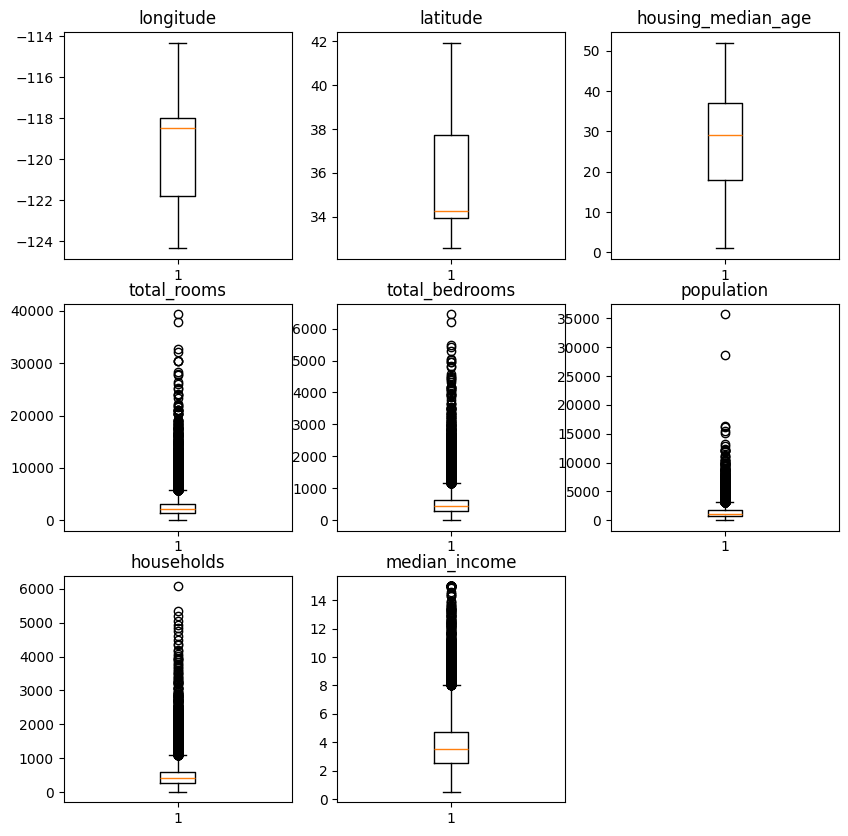

In [23]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))

for (feature, ax) in zip(numerical_features, axs.flat):
    ax.boxplot(df[feature])
    ax.set_title(feature)
axs.flat[-1].axis("off")
plt.show()

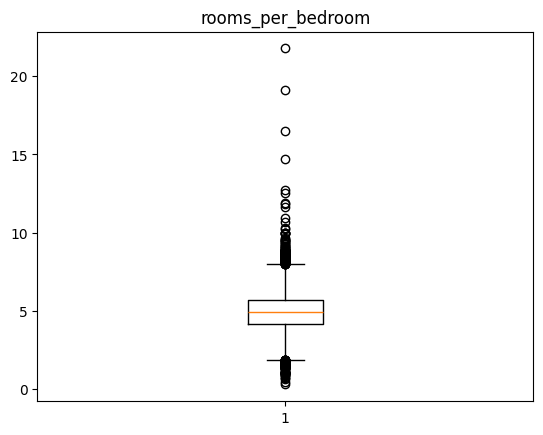

In [24]:
df["rooms_per_bedroom"] = df["total_rooms"] / df["total_bedrooms"]
plt.boxplot(df["rooms_per_bedroom"])
plt.title("rooms_per_bedroom")
plt.show()

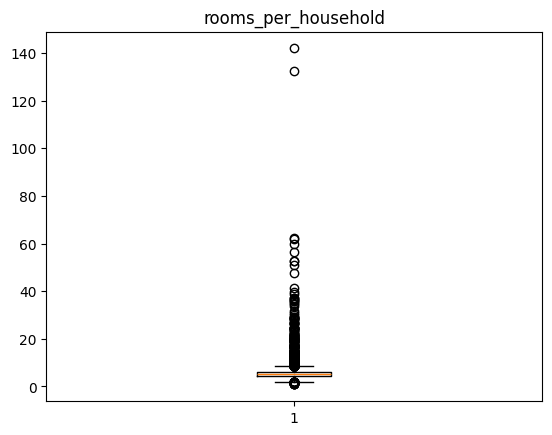

In [25]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
plt.boxplot(df["rooms_per_household"])
plt.title("rooms_per_household")
plt.show()

In [26]:
df[df["rooms_per_household"] > 40]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity,ocean_proximity_enc,ocean_proximity_enc_2,rooms_per_bedroom,rooms_per_household
1240,-120.19,38.42,11.0,1568.0,369.0,82.0,33.0,3.1250,77500.0,INLAND,1.0,4,4.249322,47.515152
1912,-120.16,39.01,16.0,1463.0,264.0,54.0,26.0,4.9750,206300.0,INLAND,1.0,4,5.541667,56.269231
1913,-120.06,39.01,19.0,2967.0,528.0,112.0,48.0,4.0714,437500.0,INLAND,1.0,4,5.619318,61.812500
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,1.0,4,5.535461,141.909091
1979,-120.08,38.80,34.0,1988.0,511.0,36.0,15.0,4.6250,162500.0,INLAND,1.0,4,3.890411,132.533333
2395,-119.34,37.12,23.0,1881.0,380.0,64.0,37.0,3.8750,125000.0,INLAND,1.0,4,4.950000,50.837838
9676,-119.02,37.64,14.0,5919.0,1278.0,265.0,112.0,3.2431,221400.0,INLAND,1.0,4,4.631455,52.848214
11707,-120.06,39.15,22.0,2213.0,372.0,98.0,42.0,1.1912,170000.0,INLAND,1.0,4,5.948925,52.690476
11832,-120.33,39.30,16.0,868.0,178.0,44.0,21.0,3.0000,175000.0,INLAND,1.0,4,4.876404,41.333333
11862,-121.25,40.27,25.0,958.0,245.0,28.0,16.0,2.6250,67500.0,INLAND,1.0,4,3.910204,59.875000


In [27]:
df["encoded_position"] = df["longitude"] + df["latitude"]
df["encoded_position"]

0       -84.35
1       -84.36
2       -84.39
3       -84.40
4       -84.40
         ...  
20635   -81.61
20636   -81.72
20637   -81.79
20638   -81.89
20639   -81.87
Name: encoded_position, Length: 20640, dtype: float64

In [28]:
df["population_per_bedrooms"] = df["population"] / df["total_bedrooms"]

In [29]:
corr_with_target = \
    df.drop(["ocean_proximity", "target"], axis=1).corrwith(df["target"]).abs().sort_values(ascending=False)
corr_with_target

median_income              0.688075
encoded_position           0.491520
ocean_proximity_enc_2      0.383244
rooms_per_bedroom          0.373911
rooms_per_household        0.151948
latitude                   0.144160
total_rooms                0.134153
housing_median_age         0.105623
ocean_proximity_enc        0.081750
households                 0.065843
total_bedrooms             0.049454
longitude                  0.045967
population                 0.024650
population_per_bedrooms    0.019007
dtype: float64

In [30]:
def remove_outliers(df, quantile=0.05):
    Q1 = df.quantile(quantile)
    Q3 = df.quantile(1-quantile)
    IQR = Q3 - Q1
    
    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_no_outliers = remove_outliers(df.drop("ocean_proximity", axis=1))
df_no_outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity_enc,ocean_proximity_enc_2,rooms_per_bedroom,rooms_per_household,encoded_position,population_per_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0,2,6.821705,6.984127,-84.35,2.496124
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0,2,6.418626,6.238137,-84.36,2.170886
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0,2,7.721053,8.288136,-84.39,2.610526
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0,2,5.421277,5.817352,-84.40,2.374468
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0,2,5.810714,6.281853,-84.40,2.017857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.0,4,4.451872,5.045455,-81.61,2.259358
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.0,4,4.646667,6.114035,-81.72,2.373333
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.0,4,4.647423,5.205543,-81.79,2.076289
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.0,4,4.547677,5.329513,-81.89,1.811736


In [31]:
corr_with_target_no_outliers = \
    df_no_outliers.drop(["target"], axis=1).corrwith(df_no_outliers["target"]).abs().sort_values(ascending=False)

diff = (corr_with_target_no_outliers - corr_with_target)
rel_diff = (diff/corr_with_target_no_outliers).sort_values(ascending=False)

pd.DataFrame({"Correlation with target": corr_with_target, 
              "Correlation with target without outliers": corr_with_target_no_outliers,
              "Difference": diff,
              "Relative Difference": rel_diff}).sort_values("Relative Difference", ascending=False)

,Correlation with target,Correlation with target without outliers,Difference,Relative Difference
population_per_bedrooms,0.019007,0.211219,0.192212,0.910012
rooms_per_household,0.151948,0.307836,0.155888,0.506399
population,0.024650,0.042696,0.018046,0.422670
total_rooms,0.134153,0.150562,0.016409,0.108986
housing_median_age,0.105623,0.108582,0.002959,0.027249
encoded_position,0.491520,0.499504,0.007984,0.015984
longitude,0.045967,0.046377,0.000410,0.008851
rooms_per_bedroom,0.373911,0.376084,0.002173,0.005778
median_income,0.688075,0.689257,0.001182,0.001715
ocean_proximity_enc_2,0.383244,0.383432,0.000188,0.000490


# Final feature engineering

In [43]:
def apply_feature_engineering(df: pd.DataFrame, remove_outliers) -> pd.DataFrame:
    df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())
    custom_encoding = {"ISLAND": 4, "NEAR OCEAN": 3, "NEAR BAY": 2, "<1H OCEAN": 1, "INLAND": 0}
    df["ocean_proximity_enc"] = df.replace({"ocean_proximity": custom_encoding})["ocean_proximity"]
    df = df.drop("ocean_proximity", axis=1)
    df["rooms_per_bedroom"] = df["total_rooms"] / df["total_bedrooms"]
    df["rooms_per_household"] = df["total_rooms"] / df["households"]
    df["encoded_position"] = df["longitude"] + df["latitude"]
    df["population_per_bedrooms"] = df["population"] / df["total_bedrooms"]
    if remove_outliers:
        df = remove_outliers(df, 0.05)
    return df

In [44]:
final_df = apply_feature_engineering(df, remove_outliers)

/tmp/ipykernel_5406/3138525918.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["ocean_proximity_enc"] = df.replace({"ocean_proximity": custom_encoding})["ocean_proximity"]


In [46]:
final_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,target,ocean_proximity_enc,ocean_proximity_enc_2,rooms_per_bedroom,rooms_per_household,encoded_position,population_per_bedrooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2,2,6.821705,6.984127,-84.35,2.496124
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2,2,6.418626,6.238137,-84.36,2.170886
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,2,7.721053,8.288136,-84.39,2.610526
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2,2,5.421277,5.817352,-84.40,2.374468
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2,2,5.810714,6.281853,-84.40,2.017857


In [48]:
final_df.to_csv("../data/clean_housing.csv")